Bike Sharing Demand Data Set

The dataset given is hourly rental data spanning two years. For this data, training set comprise of first 19 days and test set comprise of the remaining days. The objective of this proble is to predict the total count of bikes rented during each hour.

Data Fields
datetime - hourly date + timestamp
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

Loading the data set.

Read the data and set the datetime as the index.

In [2]:
import pandas as pd
url = 'C://Users/Nikhil Jain/Desktop/Code/Linear Regression/UPX/bikes.csv'
bikes = pd.read_csv( url , index_col = 'datetime' , parse_dates = True)

In [3]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Questions:
    1- Lets try to find out what does each observation represent?
    2- What is the response variable?
    3- How many features are there?

Looking at the dataset, we can find that there is a column named 'count' whihc is a method. SO to avoid this confusion, let's rename that count column.

In [4]:
bikes.rename(columns = { 'count' : 'total'}, inplace = True)

In [5]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


I Personally love doing Pandas Profiling and generate report. Although it becomes too heavy when the data set is too large, but for smaller data set I can use this and get more insight on the data. Helps in visualizing.

In [7]:
import pandas_profiling
report = pandas_profiling.ProfileReport(bikes)
report.to_file('bikes.html')

The report suggests that there are no missing values and also there a some correlation between temp and atemp. So Lets find out by visualizing the data. Lets do some EDA now.

Visualizing the data.

Importing basic packages.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

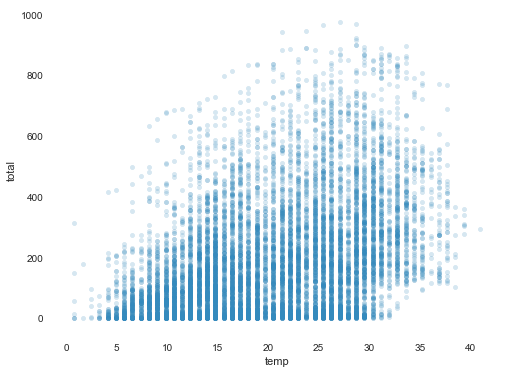

In [12]:
# Pandas Scatter Plot
bikes.plot(kind='scatter', x='temp' , y='total' , alpha=0.2)


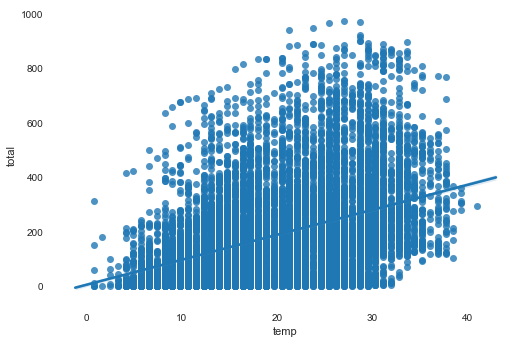

In [13]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.8})

Linear Regression Basics

Form of linear regression 
    𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+...+𝛽𝑛𝑥𝑛 
            𝑦  is the response
            𝛽0  is the intercept
            𝛽1  is the coefficient for  𝑥1  (the first feature)
            𝛽𝑛  is the coefficient for  𝑥𝑛  (the nth feature)
            
    The  𝛽  values are called the model coefficients:

            These values are estimated (or "learned") during the model fitting process using the least squares criterion.
            Specifically, we are going to find the line (mathematically) which minimizes the sum of squared residuals (or 
            "sum of squared errors").
            And once we've learned these coefficients, we can use the model to predict the response.

Building a Linear Regression Model.

For more info, refer : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [14]:
#Let's create X and y

feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [15]:
#import, instantiate, and fit Linear Regression Model

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#printing the coefficients

print(linreg.intercept_)
print(linreg.coef_)

6.046212959616469
[9.17054048]


Interpreting the intercept ( 𝛽0 ):

    It is the value of  𝑦  when  𝑥 =0.
    Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
    Note: It does not always make sense to interpret the intercept. (Why?)

Interpreting the "temp" coefficient ( 𝛽1 ):

    It is the change in  𝑦  divided by change in  𝑥 , or the "slope".
    Thus, a temperature increase of 1 degree Celsius is associated with a rental increase of 9.17 bikes.
    This is not a statement of causation.
    𝛽1  would be negative if an increase in temperature was associated with a decrease in rentals.

Using the Model for Prediction

Q- How many bike rentals would we predict if the temperature was 25 degrees Celsius?

In [18]:
#Manual Calculation

linreg.intercept_ + linreg.coef_*25

array([235.309725])

In [19]:
#calculation using predict method

linreg.predict(pd.DataFrame([25]))

array([235.309725])

Does the Scale of the feature matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [20]:
#create a new column for Fehrenheit temperature.

bikes['temp_F'] = bikes.temp*1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


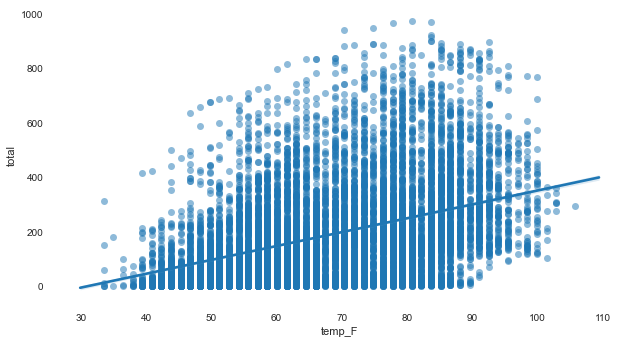

In [24]:
#seaborn scatter plot with regression line

sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.8, scatter_kws={'alpha': 0.5})

In [25]:
#create x and y

feature_cols=['temp_F']
X=bikes[feature_cols]
y=bikes.total

#instantiate and fit

linreg = LinearRegression()
linreg.fit(X,y)

#print the coefficients

print(linreg.intercept_)
print(linreg.coef_)

-156.98561782129275
[5.09474471]


In [26]:
#Taking the same temperature 25 degress celcius and converting it to Fehrenheit

25*1.8+32

77.0

In [27]:
#Predicting rentals for 77 degress fahrenheit

linreg.predict(pd.DataFrame([77]))

array([235.309725])

Conclusion: The scale of the features is irrelevant for linear regression models. When changing the scale, we simply change our interpretation of the coefficients.

In [28]:
#remove the temp_F column. Have to bring it to uniform scale

bikes.drop('temp_F', axis=1, inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Working with multiple features.

In [29]:
#Let's consider the folowing features.

feature_cols = ['temp','season', 'weather', 'humidity']

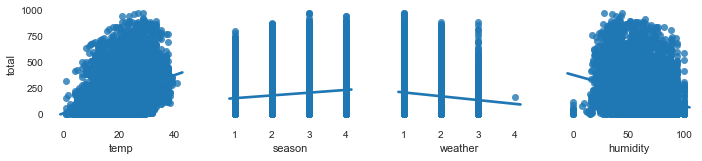

In [30]:
#multiple scatter plots in one 

sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg' )

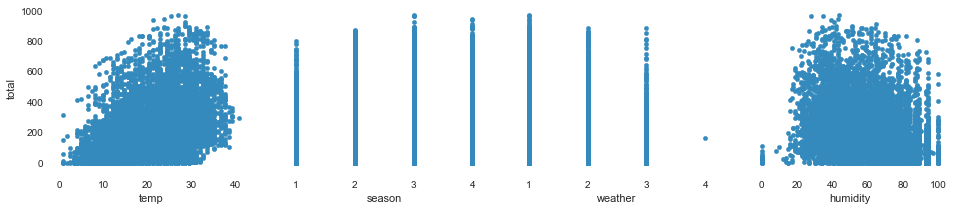

In [36]:
#multiple scatter plot with Pandas
fig, axs = plt.subplots(1,len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16,3))

Are you seeing anything that you did not expect?

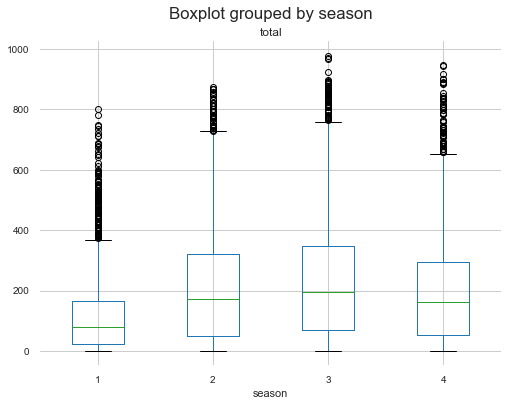

In [37]:
#box plot of rentals grouped by season

bikes.boxplot(column='total', by='season')

Notably:

    1- A line cannot capture a non linear relationship.
    
    2- There are more rentals in winter than in spring.

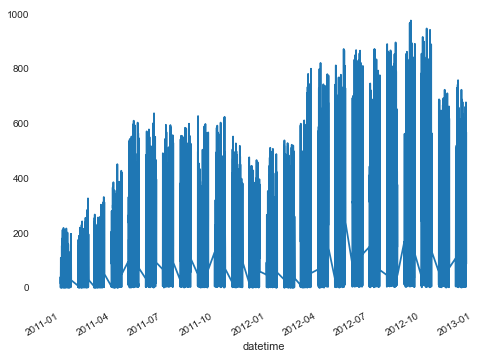

In [38]:
#line plot of rentals

bikes.total.plot()

What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing overall growth and the winter months happen to come after the spring months.

Adding more features to the model.

In [39]:
#Creating a list of feature

feature_cols=['temp', 'season', 'weather', 'humidity']

In [40]:
#Create X and Y

X=bikes[feature_cols]
y= bikes.total

In [41]:
#Instantiate and fit 

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
#Print the coefficients

print(linreg.intercept_)
print(linreg.coef_)

159.52068786129718
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [43]:
#pair the feature names with the coefficients.

list(zip(feature_cols, linreg.coef_))

[('temp', 7.864824992477452),
 ('season', 22.53875753246686),
 ('weather', 6.670302035923754),
 ('humidity', -3.118873382396494)]

Interpreting the coefficients:

    Holding all other features fixed, a 1 unit increase in temperature is associated with a rental increase of 7.86 bikes.
    Holding all other features fixed, a 1 unit increase in season is associated with a rental increase of 22.5 bikes.
    Holding all other features fixed, a 1 unit increase in weather is associated with a rental increase of 6.67 bikes.
    Holding all other features fixed, a 1 unit increase in humidity is associated with a rental decrease of 3.12 bikes.
    
Does anything look incorrect?

Choosing Between the models.

Feature selection 
               
How do we choose which features to include in the model? We're going to use train/test split (and eventually cross-validation).

Why not use of p-values or R-squared for feature selection?

Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
Features that are unrelated to the response can still have significant p-values.
Adding features to your model that are unrelated to the response will always increase the R-squared value, and adjusted R-squared does not sufficiently account for this.
p-values and R-squared are proxies for our goal of generalization, whereas train/test split and cross-validation attempt to directly estimate how well the model will generalize to out-of-sample data.

Evaluation metrics for regression problems 

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [44]:
#Lets take an example of true and predicted value.

true = [10,7,5,5]
pred = [8,6,5,10]

In [45]:
#Calculate these metrics by hand

from sklearn import metrics
import numpy as np
print('MAE: ', metrics.mean_absolute_error(true,pred))
print('MSE: ', metrics.mean_squared_error(true,pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(true,pred)))

MAE:  2.0
MSE:  7.5
RMSE:  2.7386127875258306


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [46]:
#Same true value as above
true = [10,7,5,5]

#new predicted value
pred = [10,7,5,13]


print('MAE: ', metrics.mean_absolute_error(true,pred))
print('MSE: ', metrics.mean_squared_error(true,pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(true,pred)))

MAE:  2.0
MSE:  16.0
RMSE:  4.0


MAE is same as begfore but MSE and RMSE are larger.

Comparing models with train/test split and RMSE.

In [50]:
from sklearn.model_selection import train_test_split

#Define a function that accepts a list of features and returns testing RMSE

def train_test_rmse(feature_cols):
    X=bikes[feature_cols]
    y=bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [51]:
#compare different sets of features

print(train_test_rmse(['temp','season', 'weather', 'humidity']))
print(train_test_rmse(['temp','season', 'weather']))
print(train_test_rmse(['temp','season', 'humidity']))

155.64945913079674
164.1653997629182
155.59818936691417


In [52]:
# using these as features is not allowed!
print (train_test_rmse(['casual', 'registered']))

1.1967112622044709e-13


Comparing testing RMSE with null RMSE          <a id='testRMSE'>

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [54]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([192.26451139, 192.26451139, 192.26451139, ..., 192.26451139,
       192.26451139, 192.26451139])

In [55]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

179.57906896465727

Creating Features

Handling categorical features  <a id='catfeatures'>

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [56]:
#create dummy variables

season_dummies = pd.get_dummies(bikes.season, prefix ='season')

#print 5 random rows

season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


However, we actually only need **three dummy variables (not four)**, and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the **baseline level:**

In [58]:
#drop the first column

season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

#print 5 random rows

season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


In general, if you have a categorical feature with **k possible values**, you create **k-1 dummy variables**.

If that's confusing, think about why we only need one dummy variable for holiday, not two dummy variables (holiday_yes and holiday_no).

In [59]:
#Concatenate the original data frame with the dummy dataframe(axis =0 means rows, axis=1 means columns)

bikes=pd.concat([bikes,season_dummies],axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [60]:
#include dummy variable for season in the model

feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X=bikes[feature_cols]
y=bikes.total
linreg = LinearRegression()
linreg.fit(X,y)
list(zip(feature_cols,linreg.coef_))

[('temp', 11.186405863575812),
 ('season_2', -3.3905430997182293),
 ('season_3', -41.73686071317102),
 ('season_4', 64.415961468242),
 ('humidity', -2.81948163625964)]

How do we interpret the season coefficients? They are **measured against the baseline (spring)**:

- Holding all other features fixed, **summer** is associated with a **rental decrease of 3.39 bikes** compared to the spring.
- Holding all other features fixed, **fall** is associated with a **rental decrease of 41.7 bikes** compared to the spring.
- Holding all other features fixed, **winter** is associated with a **rental increase of 64.4 bikes** compared to the spring.

Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our **interpretation** of the coefficients.

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

In [61]:
#compare original season variable with dummy season variable

print(train_test_rmse(['temp','season','humidity']))
print(train_test_rmse(['temp','season_2','season_3','season_4','humidity']))

155.59818936691417
154.33394593635998


Feature engineering

Let's see if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

In [62]:
#hour as a numeric feature

bikes['hour'] = bikes.index.hour

In [63]:
bikes.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,0,0,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,0,0,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,0,0,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0,0,0,4


In [64]:
#hour as categorical feature

hour_dummies=pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes=pd.concat([bikes,hour_dummies],axis=1)

In [65]:
bikes.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#daytime as a categorical feature

bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)
bikes['daytime']

datetime
2011-01-01 00:00:00    0
2011-01-01 01:00:00    0
2011-01-01 02:00:00    0
2011-01-01 03:00:00    0
2011-01-01 04:00:00    0
                      ..
2012-12-19 19:00:00    1
2012-12-19 20:00:00    1
2012-12-19 21:00:00    0
2012-12-19 22:00:00    0
2012-12-19 23:00:00    0
Name: daytime, Length: 10886, dtype: int32

In [67]:
print (train_test_rmse(['hour']))
print (train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print (train_test_rmse(['daytime']))

165.67174264111398
128.31120502811194
144.8911636023794


Advantages and Disdvantages   

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions